# Image Classifcation using the USPS dataset

## Introduction

The dataset contains black and white images of the numbers 0-9 and was collected in post offices in graysclae. There are 7291 training data and 2007 testing data.

In [2]:
# Import the necessary libraries
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
# Hyper-parameters
num_epochs = 30
batch_size = 4
learning_rate = 0.001

In [4]:
transform = transforms.Compose(
    [transforms.Resize((256, 256)),
     transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

# USPS
train_dataset = torchvision.datasets.USPS(root='./data', train= True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.USPS(root='./data', train = False,
                                       download=True, transform=transform)

# Set up to iterate over
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                          shuffle=False)

print('We have ', len(train_dataset),'training examples')
print('We have ', len(test_dataset),'test examples')
print(f"# iterations: {len(train_dataset)/batch_size}")

classes = {0,1,2,3,4,5,6,7,8,9}

100.0%


100.0%


We have  7291 training examples
We have  2007 test examples
# iterations: 1822.75


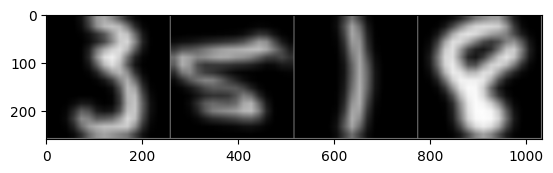

tensor([3, 5, 1, 8])

In [5]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# call the image showing function
imshow(torchvision.utils.make_grid(images))

labels


In [19]:
# Define our neutral network where the number of convolution layers and other items are defined
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride = 1, padding = 1)
        self.pool = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=2, stride = 1, padding = 1)
        self.fc1 = nn.Linear(16 * 64 * 64, 10)

    def forward(self, x):
        print(x.shape)
        x = self.pool(F.relu(self.conv1(x)))
        print(x.shape)
        x = self.pool(F.relu(self.conv2(x)))
        print(x.shape)
        x = x.reshape(x.shape[0],-1)
        print(x.shape)
        x = (self.fc1(x))
        print(x.shape)
        return x


net = Net()
fake_data = torch.randn(10, 1, 256, 256)
out = net(fake_data)
print(fake_data.device)

torch.Size([10, 1, 256, 256])
torch.Size([10, 8, 128, 128])
torch.Size([10, 16, 64, 64])
torch.Size([10, 65536])
torch.Size([10, 10])
cpu


In [22]:
# Define loss function (cross entropy loss) and optimizer (SGD with momentum)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.7)

In [23]:
# Train the network and report on loss and final accuracy

import time

start_time = time.time()
for epoch in range(2):

    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training', time.time() - start_time)
print(f'The training accuracy is: {100 * correct_train // total_train} %')

torch.Size([4, 1, 256, 256])
torch.Size([4, 8, 128, 128])
torch.Size([4, 16, 64, 64])
torch.Size([4, 65536])
torch.Size([4, 10])
torch.Size([4, 1, 256, 256])
torch.Size([4, 8, 128, 128])
torch.Size([4, 16, 64, 64])
torch.Size([4, 65536])
torch.Size([4, 10])
torch.Size([4, 1, 256, 256])
torch.Size([4, 8, 128, 128])
torch.Size([4, 16, 64, 64])
torch.Size([4, 65536])
torch.Size([4, 10])
torch.Size([4, 1, 256, 256])
torch.Size([4, 8, 128, 128])
torch.Size([4, 16, 64, 64])
torch.Size([4, 65536])
torch.Size([4, 10])
torch.Size([4, 1, 256, 256])
torch.Size([4, 8, 128, 128])
torch.Size([4, 16, 64, 64])
torch.Size([4, 65536])
torch.Size([4, 10])
torch.Size([4, 1, 256, 256])
torch.Size([4, 8, 128, 128])
torch.Size([4, 16, 64, 64])
torch.Size([4, 65536])
torch.Size([4, 10])
torch.Size([4, 1, 256, 256])
torch.Size([4, 8, 128, 128])
torch.Size([4, 16, 64, 64])
torch.Size([4, 65536])
torch.Size([4, 10])
torch.Size([4, 1, 256, 256])
torch.Size([4, 8, 128, 128])
torch.Size([4, 16, 64, 64])
torch.Size(

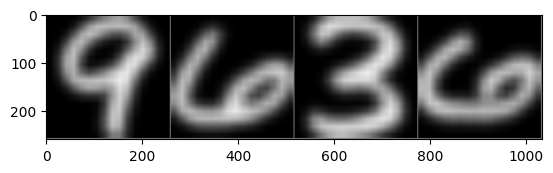

tensor([9, 6, 3, 6])


In [24]:
# Look at the test data
dataiter = iter(test_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(labels)

In [25]:
outputs = net(images)

torch.Size([4, 1, 256, 256])
torch.Size([4, 8, 128, 128])
torch.Size([4, 16, 64, 64])
torch.Size([4, 65536])
torch.Size([4, 10])


In [26]:
# Calculate final test accuracy
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct // total} %')

torch.Size([4, 1, 256, 256])
torch.Size([4, 8, 128, 128])
torch.Size([4, 16, 64, 64])
torch.Size([4, 65536])
torch.Size([4, 10])
torch.Size([4, 1, 256, 256])
torch.Size([4, 8, 128, 128])
torch.Size([4, 16, 64, 64])
torch.Size([4, 65536])
torch.Size([4, 10])
torch.Size([4, 1, 256, 256])
torch.Size([4, 8, 128, 128])
torch.Size([4, 16, 64, 64])
torch.Size([4, 65536])
torch.Size([4, 10])
torch.Size([4, 1, 256, 256])
torch.Size([4, 8, 128, 128])
torch.Size([4, 16, 64, 64])
torch.Size([4, 65536])
torch.Size([4, 10])
torch.Size([4, 1, 256, 256])
torch.Size([4, 8, 128, 128])
torch.Size([4, 16, 64, 64])
torch.Size([4, 65536])
torch.Size([4, 10])
torch.Size([4, 1, 256, 256])
torch.Size([4, 8, 128, 128])
torch.Size([4, 16, 64, 64])
torch.Size([4, 65536])
torch.Size([4, 10])
torch.Size([4, 1, 256, 256])
torch.Size([4, 8, 128, 128])
torch.Size([4, 16, 64, 64])
torch.Size([4, 65536])
torch.Size([4, 10])
torch.Size([4, 1, 256, 256])
torch.Size([4, 8, 128, 128])
torch.Size([4, 16, 64, 64])
torch.Size(

## Conclusion

By changing the momentum in the stochastic gradient descent optimizer algorithm I was able to improve the final test accuracy. 

## References

1. <i>Training a classifier</i>. Training a Classifier - PyTorch Tutorials 2.2.2+cu121 documentation. (n.d.). https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

2. Hull, J. J. (1994). A database for handwritten text recognition research. <i>IEEE Transactions on Pattern Analysis and Machine Intelligence</i>, 16(5), 550–554. https://doi.org/10.1109/34.291440 